<a href="https://colab.research.google.com/github/shinzokuro/Cnn/blob/alex/softmarginSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns

In [2]:
from sklearn import preprocessing

In [3]:
def load_data(cols):
    iris = sns.load_dataset("iris")
    iris = iris.tail(100)
 
    le = preprocessing.LabelEncoder()
    y = le.fit_transform(iris["species"])
 
    X = iris.drop(["species"], axis=1)
 
    if len(cols) > 0:
        X = X[cols]
 
    return X.values, y

(100, 2)
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.  1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
train score: 0.94
[1. 1.]


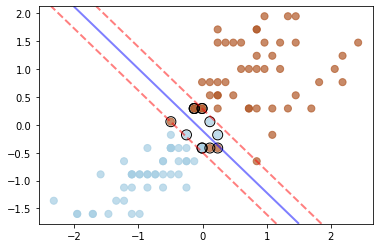

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
 
 
class LinearSVMUsingSoftMargin:
    def __init__(self, C=1.0):
        self._support_vectors = None
        self.C = C
        self.beta = None
        self.b = None
        self.X = None
        self.y = None
 
        # n is the number of data points
        self.n = 0
 
        # d is the number of dimensions
        self.d = 0
 
    def __decision_function(self, X):
        return X.dot(self.beta) + self.b
 
    def __cost(self, margin):
        return (1 / 2) * self.beta.dot(self.beta) + self.C * np.sum(np.maximum(0, 1 - margin))
 
    def __margin(self, X, y):
        return y * self.__decision_function(X)
 
    def fit(self, X, y, lr=1e-3, epochs=500):
        # Initialize Beta and b
        self.n, self.d = X.shape
        print(X.shape)
        self.beta = np.random.randn(self.d)
        self.b = 0
 
        # Required only for plotting
        self.X = X
        self.y = y
 
        loss_array = []
        for _ in range(epochs):
            margin = self.__margin(X, y)
            loss = self.__cost(margin)
            loss_array.append(loss)
 
            misclassified_pts_idx = np.where(margin < 1)[0]
            #print(lr)
            d_beta = self.beta - self.C * y[misclassified_pts_idx].dot(X[misclassified_pts_idx])
            self.beta = self.beta - lr * d_beta
 
            d_b = - self.C * np.sum(y[misclassified_pts_idx])
            self.b = self.b - lr * d_b
 
        self._support_vectors = np.where(self.__margin(X, y) <= 1)[0]
 
    def predict(self, X):
        return np.sign(self.__decision_function(X))
 
    def score(self, X, y):
        P = self.predict(X)
        print(P)
        return np.mean(y == P)
 
    def plot_decision_boundary(self):
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, s=50, cmap=plt.cm.Paired, alpha=.7)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
 
        # create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = self.__decision_function(xy).reshape(XX.shape)
 
        # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors=['r', 'b', 'r'], levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'], linewidths=[2.0, 2.0, 2.0])
 
        # highlight the support vectors
        ax.scatter(self.X[:, 0][self._support_vectors], self.X[:, 1][self._support_vectors], s=100,
                   linewidth=1, facecolors='none', edgecolors='k')
 
        plt.show()
 
 
def load_data(cols):
    iris = sns.load_dataset("iris")
    iris = iris.tail(100)
    #print(iris)
 
    le = preprocessing.LabelEncoder()
    y = le.fit_transform(iris["species"])
 
    X = iris.drop(["species"], axis=1)
 
    if len(cols) > 0:
        X = X[cols]
    #print(X,y)
    return X.values, y
 
 
if __name__ == '__main__':
    # make sure the targets are (-1, +1)
    cols = ["petal_length", "petal_width"]
    X, y = load_data(cols)
 
    y[y == 0] = -1
 
    # scale the data
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    # now we'll use our custom implementation
    model = LinearSVMUsingSoftMargin(C=15.0)
 
    model.fit(X, y)
    print("train score:", model.score(X, y))
    print(model.predict(np.array(0.2)))
 
    model.plot_decision_boundary()